In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

2.0.0-rc0


In [2]:
vocab_size = 5000
embedding_dim = 64
max_lenght = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [3]:
articles = []
labels = []

with open ('text.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' '+ word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
    
print(len(labels))
print(len(articles))

2225
2225


In [4]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


In [5]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

In [6]:
train_sequence = tokenizer.texts_to_sequences(train_articles)
print(train_sequence[50])

[2452, 1, 1, 322, 66, 4158, 2452, 580, 607, 562, 322, 186, 99, 226, 1134, 174, 2187, 1678, 840, 1, 667, 1, 210, 2, 1252, 1758, 3576, 24, 713, 192, 990, 1, 667, 210, 2452, 23, 37, 629, 1132, 4347, 1447, 105, 667, 1163, 1, 298, 522, 61, 667, 2452, 41, 10, 691, 96, 1, 29, 1, 1679, 1252, 729, 4347, 183, 836, 2529, 375, 2743, 1027, 2365, 1862, 822, 1180, 1165, 481, 946, 28, 51, 322, 15, 356, 3298, 27, 2743, 6, 1, 322, 1, 3576, 59, 11, 1, 169, 1017, 365, 667, 2, 340, 215, 150, 1152, 1, 1, 1, 14, 14, 1533, 70, 1, 1263, 61, 61, 2913, 432, 298, 9, 905, 148, 472]


In [8]:
train_padded = pad_sequences(train_sequence, maxlen=max_lenght,
                             padding=padding_type, truncating=trunc_type)

print(len(train_sequence[0]))
print(len(train_padded[0]))

print(len(train_sequence[1]))
print(len(train_padded[1]))

print(len(train_sequence[10]))
print(len(train_padded[10]))

425
200
192
200
186
200


In [9]:
print(train_padded[10])

[2431    1  225 4994   22  641  587  225 4994    1    1 1661    1    1
 2431   22  565    1    1  140  278    1  140  278  796  823  662 2307
    1 1145 1692    1 1719 4995    1    1    1    1    1 4737    1    1
  122 4513    1    2 2873 1505  352 4738    1   52  341    1  352 2171
 3961   41   22 3794    1    1    1    1  542    1    1    1  835  631
 2366  347 4739    1  365   22    1  787 2367    1 4301  138   10    1
 3663  682 3531    1   22    1  414  823  662    1   90   13  633    1
  225 4994    1  600    1 1692 1022    1 4996  808 1863  117    1    1
    1 2974   22    1   99  278    1 1606 4997  542  492    1 1444 4740
  778 1320    1 1860   10   33  641  319    1   62  478  565  301 1506
   22  479    1    1 1664    1  797    1 3066    1 1364    6    1 2431
  565   22 2971 4734    1    1    1    1    1  850   39 1823  675  297
   26  979    1  882   22  361   22   13  301 1506 1342  374   20   63
  883 1097 4302  247    0    0    0    0    0    0    0    0    0    0
    0 

In [11]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences,
                                 maxlen=max_lenght, padding=padding_type,
                                 truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


In [14]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
                              
                              
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)
                              
print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [16]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items() ])

#reverse_word_index

def decode_articles(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_articles(train_padded[50]))
print('----')
print(train_articles[50])

lewsey <OOV> <OOV> try england josh lewsey claimed denied late try side six nations loss ireland wasps wing insisted <OOV> ball <OOV> line said referee jonathan kaplan made wrong decision positive <OOV> ball line lewsey told bbc sport certainly turnover driven put ball ground <OOV> went let go ball lewsey added one irish players <OOV> back <OOV> surprise referee gave turnover far concerned incident mark cueto effort charlie hodgson cross field kick led looked like good try two key elements game cueto also <OOV> try <OOV> kaplan think could <OOV> without doubt behind ball said sale player move planned <OOV> <OOV> <OOV> time time again say <OOV> decisions go go you today went us tough international level ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
----
lewsey puzzle disallowed try england josh lewsey claimed denied late try side six nations loss ireland.  wasps wing i

In [17]:
model = tf.keras.Sequential([
   
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [18]:
print(set(labels))

{'sport', 'tech', 'politics', 'entertainment', 'business'}


In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, 
                    validation_data = (validation_padded, validation_label_seq), 
                    verbose=2)

Train on 1780 samples, validate on 445 samples
Epoch 1/10
1780/1780 - 16s - loss: 1.5640 - accuracy: 0.3006 - val_loss: 1.3418 - val_accuracy: 0.4674
Epoch 2/10
1780/1780 - 8s - loss: 0.9865 - accuracy: 0.6118 - val_loss: 0.7717 - val_accuracy: 0.7169
Epoch 3/10
1780/1780 - 8s - loss: 0.3927 - accuracy: 0.8826 - val_loss: 0.3442 - val_accuracy: 0.8854
Epoch 4/10
1780/1780 - 8s - loss: 0.0963 - accuracy: 0.9792 - val_loss: 0.3319 - val_accuracy: 0.8989
Epoch 5/10
1780/1780 - 8s - loss: 0.0577 - accuracy: 0.9826 - val_loss: 0.2780 - val_accuracy: 0.9236
Epoch 6/10
1780/1780 - 8s - loss: 0.0079 - accuracy: 0.9994 - val_loss: 0.2927 - val_accuracy: 0.9393
Epoch 7/10
1780/1780 - 7s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.2755 - val_accuracy: 0.9416
Epoch 8/10
1780/1780 - 8s - loss: 0.0195 - accuracy: 0.9955 - val_loss: 0.3165 - val_accuracy: 0.9079
Epoch 9/10
1780/1780 - 7s - loss: 0.0071 - accuracy: 0.9989 - val_loss: 0.3321 - val_accuracy: 0.9169
Epoch 10/10
1780/1780 - 8s - loss:

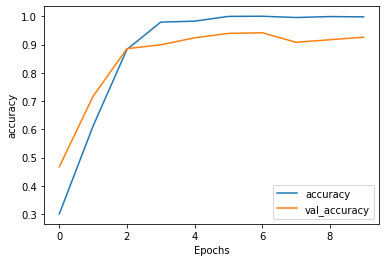

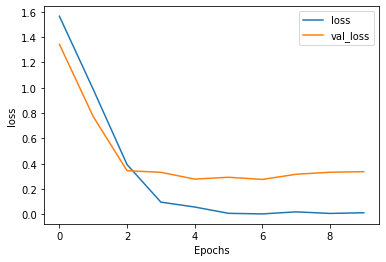

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")